In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn.neighbors import KNeighborsClassifier



In [4]:
df=pd.read_csv('UpdatedResumeDataSet.csv',encoding='utf-8')

In [6]:
df.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [14]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Operations Manager           40
Data Science                 40
Sales                        40
Blockchain                   40
Mechanical Engineer          40
ETL Developer                40
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64

In [16]:
len(df['Category'].unique())

25

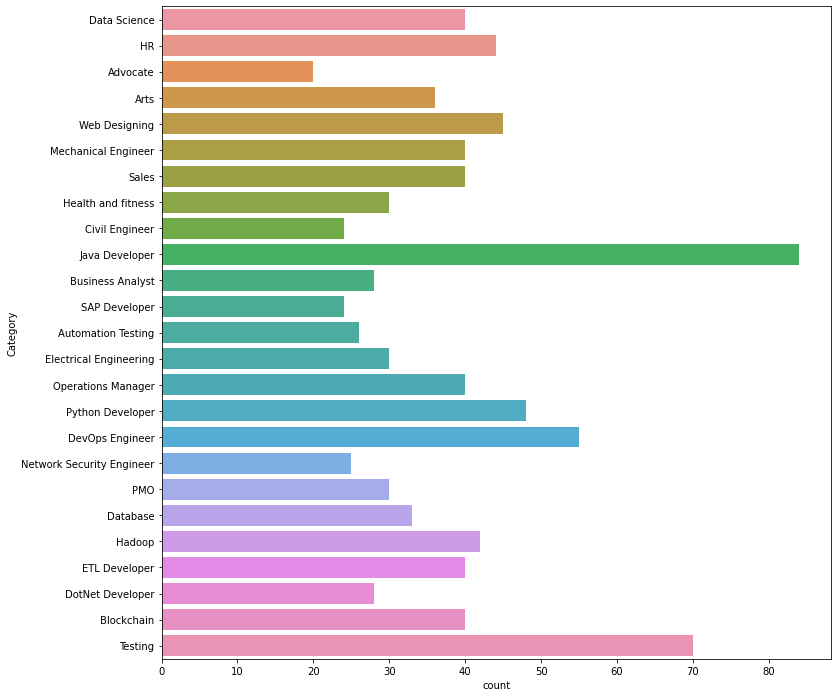

In [18]:
plt.figure(figsize=(12,12))
sns.countplot(y='Category',data=df)

In [21]:
import re

In [27]:
def clearresume(resumetext):
    resumetext=re.sub('http\s+\S*'," ",resumetext)#Remove https
    resumetext=re.sub('RT|cc',' ',resumetext)#remove CC and RT
    resumetext=re.sub('#\S+',' ',resumetext) #remove #
    resumetext=re.sub('@/S+',' ',resumetext)#remove @
    resumetext=re.sub('[%s]' %re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ',resumetext)#remove the exclaimation/punctuation
    resumetext=re.sub(r'[^\x00-\x7f]',r' ', resumetext)#remove digits
    resumetext=re.sub('\s+', ' ', resumetext)#remove whitespace
    
    return resumetext



In [28]:
df['cleared_resume']=''
df['cleared_resume']=df.Resume.apply(lambda x: clearresume(x))

In [26]:
df.Resume

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [29]:
df.cleared_resume

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: cleared_resume, Length: 962, dtype: object

In [31]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [32]:
pip install wordcloud

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Users\lakgos01\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "C:\Users\lakgos01\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\lakgos01\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Users\lakgos01\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\lakgos01\Anaconda3\lib\site-pack

In [33]:
from wordcloud import WordCloud

In [39]:
all_words=set(stopwords.words('english')+['``',"''"])

In [37]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lakgos01\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [40]:
all_words

{"''",
 '``',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over

In [41]:
Sentences=df['Resume'].values

In [44]:
len(Sentences)

962

In [45]:
cleanedSentences=''
totalwords=[]

In [49]:
for i in range(0,160):
    cleartext=clearresume(Sentences[i])
    cleanedSentences+=cleartext
    requiredwords=nltk.word_tokenize(cleartext)
    for word in requiredwords:
        if word not in all_words and word not in string.punctuation:
            totalwords.append(word)

In [48]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lakgos01\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [50]:
totalwords

['Skills',
 'Programming',
 'Languages',
 'Python',
 'pandas',
 'numpy',
 'scipy',
 'scikit',
 'learn',
 'matplotlib',
 'Sql',
 'Java',
 'JavaScript',
 'JQuery',
 'Machine',
 'learning',
 'Regression',
 'SVM',
 'Na',
 'Bayes',
 'KNN',
 'Random',
 'Forest',
 'Decision',
 'Trees',
 'Boosting',
 'techniques',
 'Cluster',
 'Analysis',
 'Word',
 'Embedding',
 'Sentiment',
 'Analysis',
 'Natural',
 'Language',
 'processing',
 'Dimensionality',
 'reduction',
 'Topic',
 'Modelling',
 'LDA',
 'NMF',
 'PCA',
 'Neural',
 'Nets',
 'Database',
 'Visualizations',
 'Mysql',
 'SqlServer',
 'Cassandra',
 'Hbase',
 'ElasticSearch',
 'D3',
 'js',
 'DC',
 'js',
 'Plotly',
 'kibana',
 'matplotlib',
 'ggplot',
 'Tableau',
 'Others',
 'Regular',
 'Expression',
 'HTML',
 'CSS',
 'Angular',
 '6',
 'Logstash',
 'Kafka',
 'Python',
 'Flask',
 'Git',
 'Docker',
 'computer',
 'vision',
 'Open',
 'CV',
 'understanding',
 'Deep',
 'learning',
 'Education',
 'Details',
 'Data',
 'Science',
 'Assurance',
 'Associate',

In [52]:
wordfreq=nltk.FreqDist(totalwords)
mostcommon=wordfreq.most_common(50)
print(mostcommon)

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


In [53]:
wc=WordCloud().generate(cleanedSentences)

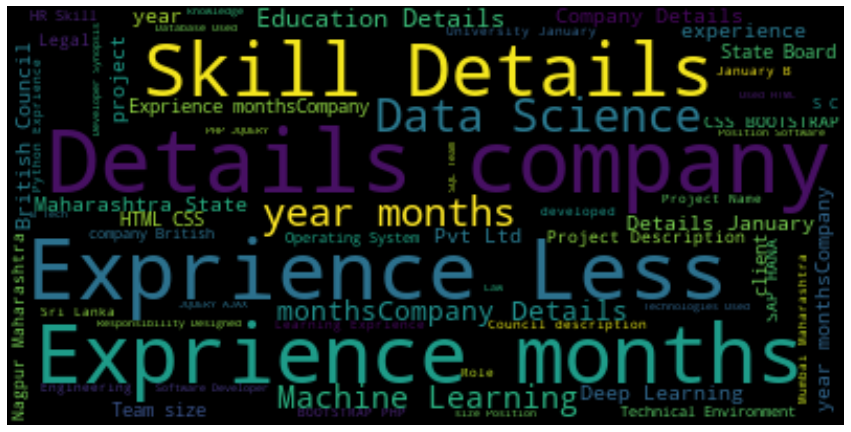

In [55]:
plt.figure(figsize=(15,15))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [57]:
from sklearn.preprocessing import LabelEncoder

var=['Category']
le=LabelEncoder()

for i in var:
    df[i]=le.fit_transform(df[i])

In [58]:
df

,Category,Resume,cleared_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,23,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [60]:
requiredtext=df['cleared_resume'].values
requiredTarget=df['Category'].values

In [61]:
word_vectorizer=TfidfVectorizer(
sublinear_tf=True,
stop_words='english',
max_features=1500)

In [67]:
word_vectorizer.fit(requiredtext)
word_features=word_vectorizer.transform(requiredtext)

In [68]:
x_train,x_test,y_train,y_test=train_test_split(word_features,requiredTarget,random_state=0,test_size=0.2)


In [69]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [70]:
clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)


In [73]:
print('Accuracy on KNeighbor Classifier on Training set {:.2f}'.format(clf.score(x_train,y_train)))

Accuracy on KNeighbor Classifier on Training set 0.99


In [74]:
print('Accuracy on KNeighbor Classifier on Test set {:.2f}'.format(clf.score(x_test,y_test)))

Accuracy on KNeighbor Classifier on Test set 0.99


In [75]:
cm=confusion_matrix(y_pred,y_test)

array([[ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0, 

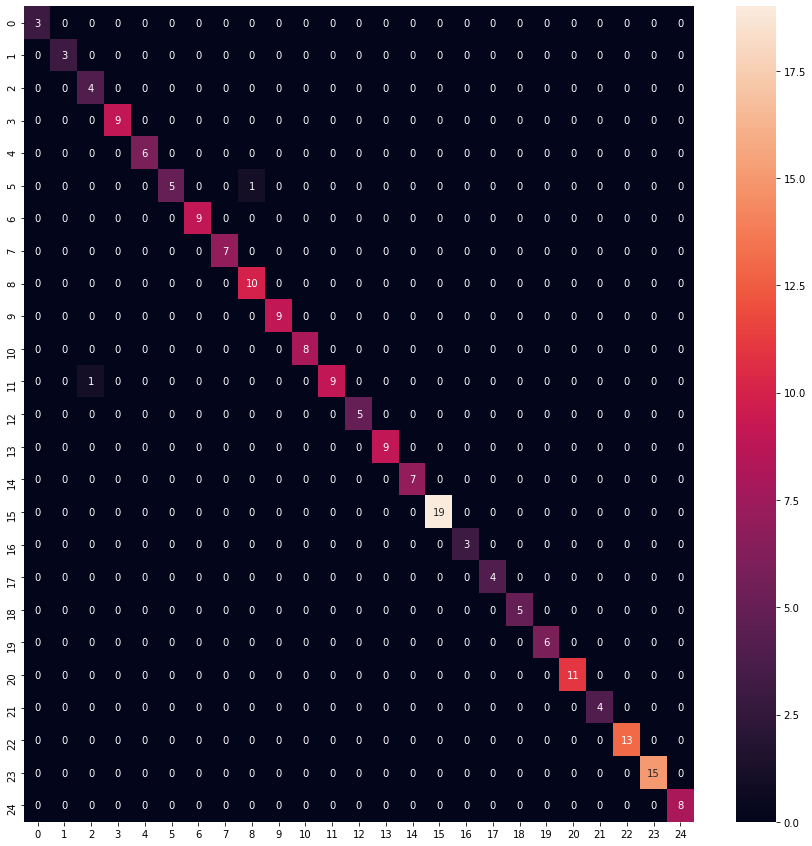

In [80]:
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True)
plt.show()